In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split


In [2]:
X = np.arange(1,51)

In [3]:
y = np.concatenate([np.zeros(25),np.ones(25)])

In [4]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

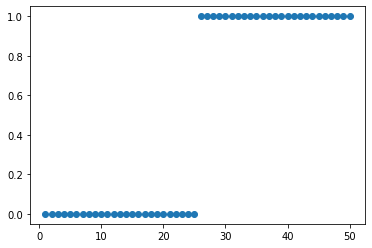

In [5]:
plt.scatter(X,y)

In [6]:
X_mean = np.mean(X)

In [7]:
X_std = np.std(X)

In [8]:
X =  (X - X_mean) / X_std

In [9]:
X

array([-1.69774938, -1.62845348, -1.55915759, -1.4898617 , -1.4205658 ,
       -1.35126991, -1.28197402, -1.21267813, -1.14338223, -1.07408634,
       -1.00479045, -0.93549455, -0.86619866, -0.79690277, -0.72760688,
       -0.65831098, -0.58901509, -0.5197192 , -0.4504233 , -0.38112741,
       -0.31183152, -0.24253563, -0.17323973, -0.10394384, -0.03464795,
        0.03464795,  0.10394384,  0.17323973,  0.24253563,  0.31183152,
        0.38112741,  0.4504233 ,  0.5197192 ,  0.58901509,  0.65831098,
        0.72760688,  0.79690277,  0.86619866,  0.93549455,  1.00479045,
        1.07408634,  1.14338223,  1.21267813,  1.28197402,  1.35126991,
        1.4205658 ,  1.4898617 ,  1.55915759,  1.62845348,  1.69774938])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=1, activation="sigmoid")
])

In [20]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [21]:
trained_model = model.fit(X_train,y_train,epochs=50,batch_size=7)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3880
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3853
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3826
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3800
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3775
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3750
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3726
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3702
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3678
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3632
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.

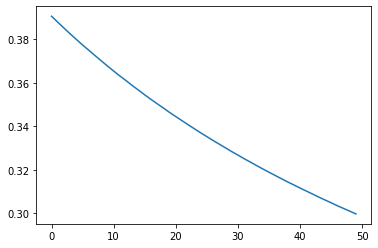

In [22]:
plt.plot(trained_model.history['loss'])

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

